In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 10
import seaborn as sns
from scipy.stats import linregress

In [2]:
toronto_df = pd.read_csv('toronto.csv')
global_df = pd.read_csv('global.csv')

In [3]:
toronto_df=toronto_df.rename(columns = {'avg_temp':'avg_toronto'})
global_df=global_df.rename(columns = {'avg_temp':'avg_global'})

In [4]:
df = pd.merge(toronto_df, global_df, how='inner',on='year')

In [5]:
df.head(10)

,year,avg_toronto,avg_global
0,1750,6.29,8.72
1,1751,6.84,7.98
2,1752,-1.10,5.78
3,1753,5.76,8.39
4,1754,5.94,8.47
5,1755,2.81,8.36
6,1756,6.37,8.85
7,1757,5.13,9.02
8,1758,4.37,6.74
9,1759,5.27,7.99


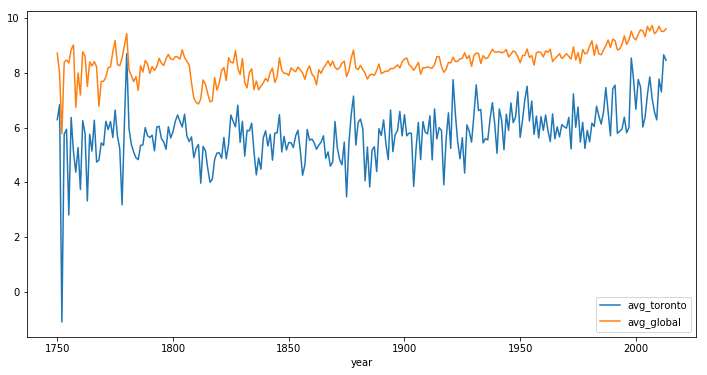

In [6]:
df=df.set_index('year')
df.plot(figsize=(12,6))

In [7]:
#parse all column names into a name list
name=list(df)

In [8]:
#for loop to create Moving Average
#rolling window is set as 10 years
for i in range(len(name)):
    df['MA_{}'.format(name[i])] = df[name[i]].rolling(window=10).mean()

In [9]:
df

,avg_toronto,avg_global,MA_avg_toronto,MA_avg_global
year,,,,
1750,6.29,8.72,NaN,NaN
1751,6.84,7.98,NaN,NaN
1752,-1.10,5.78,NaN,NaN
1753,5.76,8.39,NaN,NaN
1754,5.94,8.47,NaN,NaN
...,...,...,...,...
2009,6.28,9.51,6.933,9.493
2010,7.77,9.70,7.043,9.543
2011,7.30,9.52,6.997,9.554


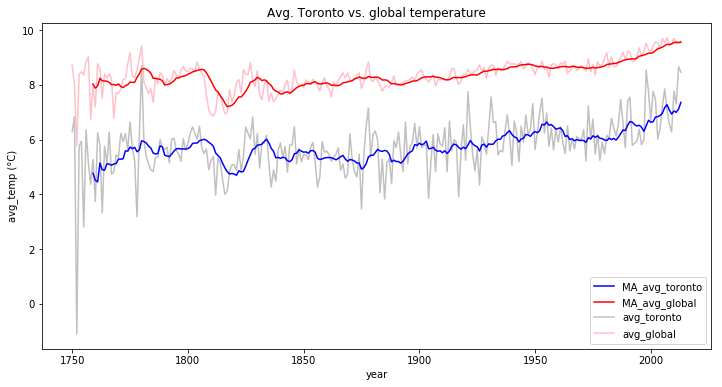

In [10]:
ax=df[['MA_avg_toronto','MA_avg_global']].plot(figsize=(12,6),color =('blue','red'),zorder=1)
ax.set_xlabel("x label")
ax2=df[['avg_toronto','avg_global']].plot(ax=ax,color =('silver','pink'),zorder=0)
plt.ylabel('avg_temp (°C)')
plt.title('Avg. Toronto vs. global temperature')
plt.show()

In [11]:
aa=df.reset_index()
aa

,year,avg_toronto,avg_global,MA_avg_toronto,MA_avg_global
0,1750,6.29,8.72,NaN,NaN
1,1751,6.84,7.98,NaN,NaN
2,1752,-1.10,5.78,NaN,NaN
3,1753,5.76,8.39,NaN,NaN
4,1754,5.94,8.47,NaN,NaN
...,...,...,...,...,...
259,2009,6.28,9.51,6.933,9.493
260,2010,7.77,9.70,7.043,9.543
261,2011,7.30,9.52,6.997,9.554
262,2012,8.66,9.51,7.115,9.548


LinregressResult(slope=0.0058759269283697145, intercept=-5.2848746975458, rvalue=0.44686253562296524, pvalue=2.3064532183249406e-14, stderr=0.0007267448588466301)

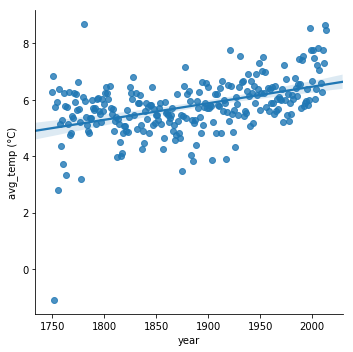

In [12]:
sns.lmplot(y='avg_toronto',x='year', data=aa)
plt.ylabel('avg_temp (°C)')
linregress(df.index,df.avg_toronto)

LinregressResult(slope=0.00461111074878203, intercept=-0.3164109344394497, rvalue=0.612114776197931, pvalue=1.5553670718288712e-28, stderr=0.00036802018675316143)

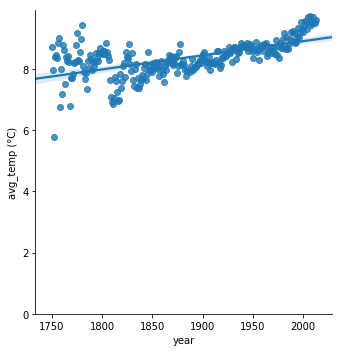

In [13]:
g = sns.lmplot(y='avg_global',x='year', data=aa)
plt.ylabel('avg_temp (°C)')
g.set(ylim=(0, None))
linregress(df.index, df.avg_global)

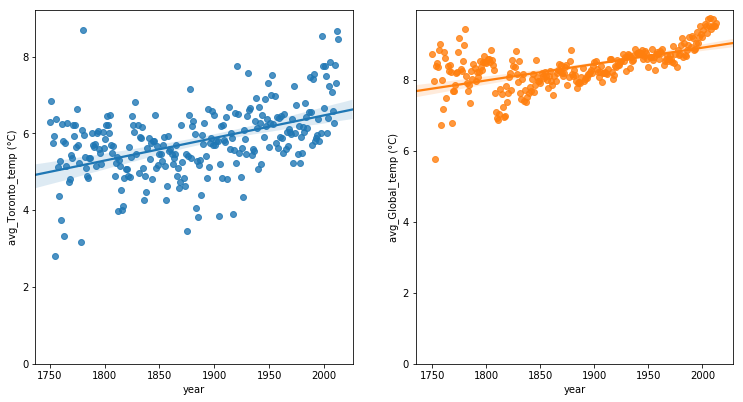

In [21]:
#Create two regplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)
#Set the size of each subplots
fig.set_size_inches(12.5, 6.5) 
f=sns.regplot(x=aa['year'], y=aa['avg_toronto'], ax=ax1)
f.set(ylim=(0, None))
g=sns.regplot(x=aa['year'], y=aa['avg_global'], ax=ax2)
f.set_ylabel('avg_Toronto_temp (°C)')
g.set(ylim=(0, None))
g.set_ylabel('avg_Global_temp (°C)')
plt.show()

In [15]:
print("Toronto's avg. temp: " + "{0:.2f}".format(df['avg_toronto'].mean()) + ' °C')
print("Global avg. temp: " + "{0:.2f}".format(df['avg_global'].mean()) + ' °C')

Toronto's avg. temp: 5.77 °C
Global avg. temp: 8.36 °C
